# Entangled resource states: Graph states and Cluster states

There are 3 common names we hear for patterns to build the resource state:
- Cluster state
- Brickwork state
- (Generic) Graph state.



A graph state is generally a graph that does not have to follow a particular structure, but the particular case where a graph with N layers (columns) and M rows has all nodes connected is known as a cluster state.


![Example of 2x2 cluster state](images/cluster+circ.png)

The nodes represent a $|+\rangle$ state and the edges between them represent a CZ gate

Cluster states can also have 1 single row, we refer to them as (1D) linear clusters

![Example of a line cluster state](images/liner-cluster3x1.png)


A brickwork state is built like a cluster but reduces the number of CZ gates. This reduction does not impact the universality, anything that can be done on a cluster can be done on a brickwork state.

![A brickwork state](images/brickwork.png)

Notice how not all nodes are connected vertically

While the previous two are graph states, the term is generally used to refer to graph states without a particularly identifiable form. A more general definition is given in  [GraphState API documentation](https://Qiskit.org/documentation/stubs/Qiskit.circuit.library.GraphState.html).
An example of a graph state that is neither cluster nor brickwork:

![A graph state](images/graph-state.png)

For the remainder of this chapter, we will focus a bit more on teleportation via a linear cluster since it is the simplest example.


# Implementing a graph state in Qiskit

Let us implement the linear cluster we saw above with 3 nodes. This cluster performs the identity. This means if the very first qubit started with 0 before the cluster preparation, then the last qubit after measurement and correction should give us a 0.

First of all, we prepare the qubit in the X basis ($ \{ |+\rangle, |-\rangle \}$), which is done using the Hadamard gate

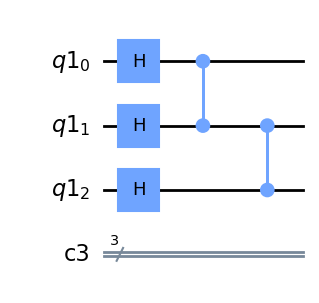

In [5]:
from Qiskit import *

nb_reg=3
q = QuantumRegister(nb_reg)
c = ClassicalRegister(nb_reg) # Changed from 9 to 1
qc = QuantumCircuit(q, c)

# apply H on all gates
for q in range(nb_reg):
    qc.h(q)
# Apply CZ to entangle the state
for q in range(nb_reg-1):
    qc.cz(q,q+1)

qc.draw(output="mpl")


Qiskit is also equipped with a primitive to prepare graph states based on an adjacency matrix.
In the above, we noticed :
- qubit 0 is connected to qubit 1 so the first row representing the neighbors of qubit 0 will have 0 for 0th place (it is not neighbor to itself) 1 for 1st place, 0 for 2nd place
so [0,1,0]
- qubit 1 is connected to qubit 0 and to qubit 2 so [1,0,1]
- qubit 2 is connected to qubit 1 so [0,1,0]

So an adjacency matrix for this graph is:

$$
\begin{equation}
\text{Adjacency matrix for linear cluster 3$\times$1} = \left[ \begin{array}{rrr} 
0 & 1 & 0 \\ 
1 & 0 & 1 \\
0 & 1 & 0 \\ 
\end{array}\right] \hspace{1cm}
\end{equation}
$$

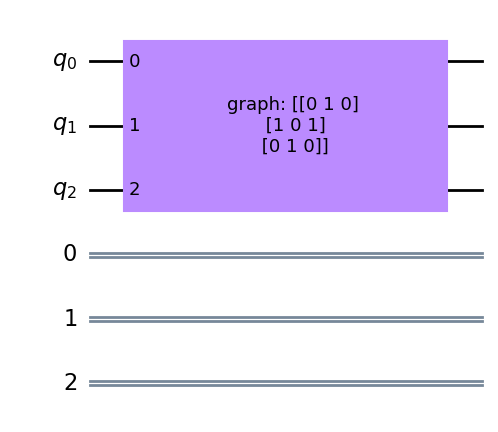

In [4]:
# Alternative way to build a graph/cluster state in Qiskit
import Qiskit as qs
mat=[[0,1,0],[1,0,1],[0,1,0]]
circ=qs.circuit.library.GraphState(mat)
cbits=ClassicalRegister(3)
circ.add_bits(cbits)
circ.draw(output="mpl")

This concludes the preparation phase, now it is time to perform the measurement.